In [1]:
import pandas as pd
import re
import string
from transformers import pipeline
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

c:\Users\POS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hanifnoerr = "hanifnoerr/Fine-tuned-Indonesian-Sentiment-Classifier"
hanifnoerr_model = pipeline(
    "sentiment-analysis",
    model=hanifnoerr,
    tokenizer=hanifnoerr,
    truncation=True,
     max_length=512
)

crypter70 = "crypter70/IndoBERT-Sentiment-Analysis"
crypter70_model = pipeline(
    "sentiment-analysis",
    model=crypter70,
    tokenizer=crypter70,
    truncation=True,
     max_length=512
)

w11wo = "w11wo/indonesian-roberta-base-sentiment-classifier"
w11wo_model = pipeline(
    "sentiment-analysis",
    model=w11wo,
    tokenizer=w11wo,
    truncation=True,
     max_length=512
)

Device set to use cpu
Device set to use cpu
Device set to use cpu


CLEANING

In [3]:
data = pd.read_csv("Review KCU Pulau Jawa - with label.csv")
data = data.dropna(subset=['review_text'])

data['review_text_cleaned'] = data['review_text'].astype(str).str.lower()
data['review_text_cleaned'] = [re.sub(r'[^\x00-\x7f]',r'', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = [re.sub(r'\n', r' ', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x)
)
# Normalize whitespace and trim
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Drop rows where cleaned text is empty string
data = data[data['review_text_cleaned'] != ""]

In [4]:
words_dict = {
    'tdk'  : 'tidak',
    'yg' : 'yang',
    'ga' : 'tidak',
    'gak' : 'tidak',
    'tp' : 'tapi',
    'd' : 'di',
    'sy' : 'saya',
    '&' : 'dan',
    'dgn' : 'dengan', 
    'utk' : 'untuk',
    'gk' : 'tidak',
    'jd' : 'jadi',
    'jg' : 'juga',
    'dr' : 'dari',
    'krn' : 'karena',
    'aja' : 'saja',
    'karna' : 'karena',
    'udah' : 'sudah',
    'kmr' : 'kamar',
    'g' : 'tidak',
    'dpt' : 'dapat',
    'banget' : 'sekali',
    'bgt' : 'sekali',
    'kalo' : 'kalau',
    'n' : 'dan', 
    'bs' : 'bisa',
    'oke' : 'ok',
    'dg' : 'dengan',
    'pake' : 'pakai',
    'sampe' : 'sampai',
    'dapet' : 'dapat',
    'ad' : 'ada',
    'lg' : 'lagi',
    'bikin' : 'buat',
    'tak' : 'tidak',
    'ny' : 'nya',
    'ngga' : 'tidak',
    'nunggu' : 'tunggu',
    'klo' : 'kalau',
    'blm' : 'belum',
    'trus' : 'terus',
    'kayak' : 'seperti',
    'dlm' : 'dalam',
    'udh' : 'sudah',
    'tau' : 'tahu',
    'org' : 'orang',
    'hrs' : 'harus',
    'msh' : 'masih',
    'sm' : 'sama',
    'byk' : 'banyak',
    'krg' : 'kurang',
    'kmar' : 'kamar',
    'spt' : 'seperti',
    'pdhl' : 'padahal',
    'chek' : 'cek',
    'pesen' : 'pesan', 
    'kran' : 'keran',
    'gitu' : 'begitu',
    'tpi' : 'tapi',
    'lbh' : 'lebih',
    'tmpt' : 'tempat',
    'dikasi' : 'dikasih',
    'serem' : 'seram', 
    'sya' : 'saya',
    'jgn' : 'jangan',
    'dri' : 'dari',
    'dtg' : 'datang',
    'gada' : 'tidak ada',
    'standart' : 'standar',
    'mlm' : 'malam',
    'k'  : 'ke',
    'kl' : 'kalau',
    'sgt': 'sangat',
    'y' : 'ya',
    'krna' : 'karena',
    'tgl' : 'tanggal', 
    'terimakasih' : 'terima kasih',
    'kecoak' : 'kecoa',
    'pd' : 'pada',
    'tdr' : 'tidur', 
    'jdi' : 'jadi',
    'kyk' : 'seperti',
    'sdh' : 'sudah',
    'ama' : 'sama',
    'gmana' : 'bagaimana',
    'dalem' : 'dalam',
    'tanyak' : 'tanya',
    'taru' : 'taruh',
    'gede' : 'besar',
    'kaya' : 'seperti',
    'access' : 'akses',
    'tetep' : 'tetap',
    'mgkin' : 'mungkin',
    'sower' : 'shower',
    'idup' : 'hidup',
    'nyaaa' : 'nya',
    'baikk' : 'baik',
    'hanay' : 'hanya',
    'tlp' : 'telpon',
    'kluarga' : 'keluarga',
    'jln' : 'jalan',
    'hr' : 'hari',
    'ngak' : 'tidak',
    'bli' : 'beli',
    'kmar' : 'kamar',
    'naro' : 'taruh',
    'telpon':'telepon',
    'nlpn':'telepon',
    'tlp':'telepon',
    'nelpon':'telepon',
    'ktr':'kantor',
    'kntr':'kantor',
    'cb' : 'coba',
    'bgs' : 'bagus',
    'mntp' : 'mantap',
    'jlk' : 'jelek',
    'smp' : 'sampai',
    'ane' : 'saya',
    'gw' : 'saya',
    'gua' : 'saya',
    'dah' : 'sudah',
    'yng' : 'yang'
}



In [5]:
list_sentence_train = []
for sentence in data['review_text_cleaned'] :
    cleaned_sentence = [words_dict[word] if word in list(words_dict.keys()) else word for word in sentence.split()]
    list_sentence_train.append(' '.join(cleaned_sentence))
data['review_text_cleaned'] = list_sentence_train

In [6]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stem
stem = []

for index, row in data.iterrows():
    try:
        sentence = row['review_text_cleaned']
        result = stemmer.stem(sentence)
    except Exception as e:
        result = 'error'
    stem.append(result)

data['review_text_cleaned'] = stem
data.head(10)

,review_text,sentiment,review_text_cleaned
0,Ayo yg mau kirim paket ato bayar tagihan bulan...,positive,ayo yang mau kirim paket ato bayar tagih bulan...
1,Nyaman dan penuh keramahan,positive,nyaman dan penuh ramah
2,Bersih,positive,bersih
3,Pelayanan nya bagus...kirim ke Bandung 1 hari ...,positive,layan nya bagus kirim ke bandung 1 hari sampai
4,Merupakan BUMN tertua di Indonesia yang masih ...,positive,rupa bumn tua di indonesia yang masih diri ged...
5,Bagus pelayanan cepat sesuai no antrian,positive,bagus layan cepat sesuai no antri
6,untuk pelayanan transaksi ria money sangat cep...,positive,untuk layan transaksi ria money sangat cepat d...
7,Stafnya sangat ramah,positive,staf sangat ramah
8,Kantornya rapih sekarang,positive,kantor rapih sekarang
9,Ciamik krn layanan untuk paket sampai jam 23.0...,positive,ciamik karena layan untuk paket sampai jam 23 ...


HANIFNOERR

In [7]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = hanifnoerr_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_hanifnoerr'] = sentiments

In [8]:
print(data['sentiment_result_hanifnoerr'].value_counts())

sentiment_result_hanifnoerr
negative    344
positive    291
neutral     158
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_10096\1922892403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')


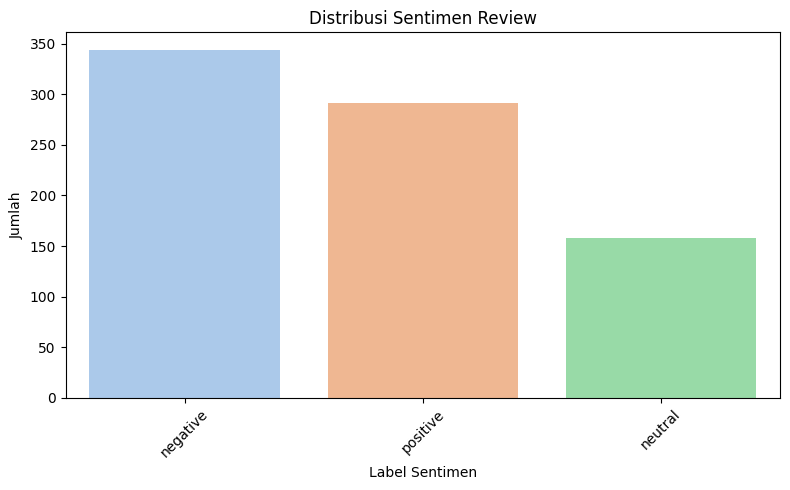

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crypter70

In [10]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = crypter70_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_crypter70'] = sentiments

In [11]:
print(data['sentiment_result_crypter70'].value_counts())

sentiment_result_crypter70
NEGATIVE    330
POSITIVE    293
NEUTRAL     170
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_10096\3126681369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')


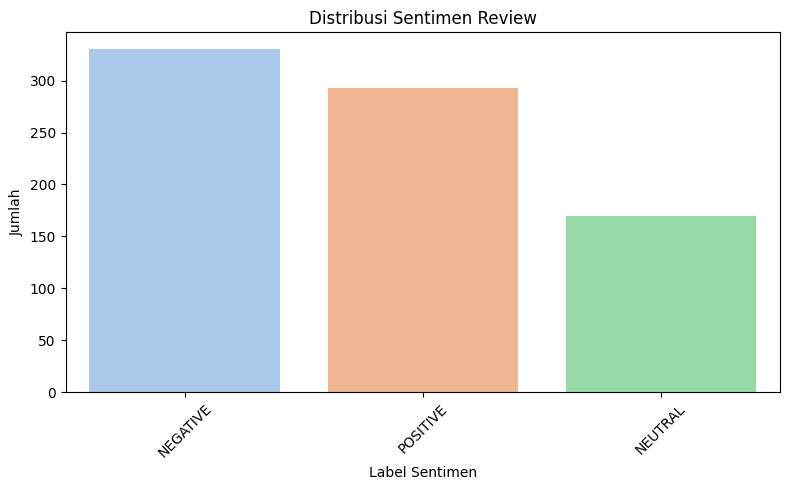

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

w11wo

In [13]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = w11wo_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_w11wo'] = sentiments

In [14]:
print(data['sentiment_result_w11wo'].value_counts())

sentiment_result_w11wo
negative    311
positive    303
neutral     179
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_10096\392182998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')


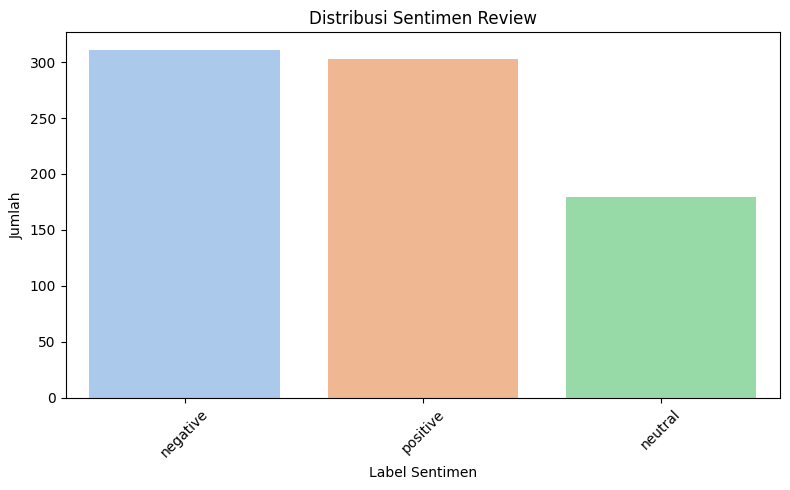

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_hanifnoerr']

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 84.36%

Classification Report:
              precision    recall  f1-score   support

    positive       0.91      0.80      0.85       333
    negative       0.89      0.92      0.90       333
     neutral       0.63      0.78      0.69       127

    accuracy                           0.84       793
   macro avg       0.81      0.83      0.82       793
weighted avg       0.86      0.84      0.85       793


Confusion Matrix:
[[265  28  40]
 [  9 305  19]
 [ 17  11  99]]


In [22]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_crypter70'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))

Accuracy: 81.84%

Classification Report:
              precision    recall  f1-score   support

    positive       0.88      0.78      0.83       333
    negative       0.89      0.89      0.89       333
     neutral       0.56      0.75      0.64       127

    accuracy                           0.82       793
   macro avg       0.78      0.80      0.79       793
weighted avg       0.84      0.82      0.82       793


Confusion Matrix:
[[259  26  48]
 [ 11 295  27]
 [ 23   9  95]]


In [23]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_w11wo']

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 81.84%

Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.80      0.83       333
    negative       0.93      0.86      0.89       333
     neutral       0.54      0.76      0.63       127

    accuracy                           0.82       793
   macro avg       0.78      0.81      0.79       793
weighted avg       0.84      0.82      0.83       793


Confusion Matrix:
[[265  18  50]
 [ 12 288  33]
 [ 26   5  96]]
